# Frage 5: Wie wurden die Folgen der Miniserie “Das Damengambit” im Durchschnitt bewertet?

## Import der Bibliotheken

In [1]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

## Import der Datensätze

In [2]:
# Speichern der benötigten URL's
url_data_ratings = "https://datasets.imdbws.com/title.ratings.tsv.gz" 
url_data_episodes = "https://datasets.imdbws.com/title.episode.tsv.gz"
url_data_information = "https://datasets.imdbws.com/title.akas.tsv.gz"

In [3]:
# Zusammenfassen der benötigten Daten (Name der Datei, URL)
title_episode_file = "title_episode.tsv.gz", url_data_episodes
title_ratings_file = "title_ratings.tsv.gz", url_data_ratings
title_information_file = "title.akas.tsv.gz", url_data_information

In [4]:
# Downloaden der Daten auf lokalem Gerät
urllib.request.urlretrieve(title_ratings_file[1], title_ratings_file[0])
urllib.request.urlretrieve(title_episode_file[1], title_episode_file[0])
urllib.request.urlretrieve(title_information_file[1], title_information_file[0])

('title.akas.tsv.gz', <http.client.HTTPMessage at 0x1aa8d285af0>)

In [15]:
# Auslesen der Informationen zu den Bewertungen und Speicherung in einer Variable
ratings = pd.read_csv(title_ratings_file[0], compression='gzip', sep = "\t") 

In [16]:
# Auslesen der Informationen zu den Episoden und Speicherung in einer Variable
episodes = pd.read_csv(title_episode_file[0], compression='gzip', sep = "\t") 

In [19]:
# Auslesen der Informationen zu der Serie und Speicherung in einer Variable
information = pd.read_csv(title_information_file[0], compression='gzip', sep = "\t") 
# Dtype Warnung aufgrund unterschiedlicher Datentypen im Datensatz

## Suche nach der Serie im Datensatz

In [18]:
# Wenn der Titel identisch mit "Das Damengambit" ist, werden die Daten aus dem Datensatz in der Variable gespeichert
titlename = information[information["title"] == "Das Damengambit"]

# Extraktion der Titelidentifikationsnummer 
# (wird benötigt um relevante Informationen der Serie in den anderen Datensätzen zu identifizieren)
# Dabei ist zu beachten, dass die Titel ID alle Ländererscheinungen umfasst

title = titlename.titleId.iloc[0] # iloc[0] entfernt die Labels von den Daten
title

'tt10048342'

In [9]:
# Rausfiltern der benötigten Episodenidentifikationsnummer anhand der Titelidentifikationsnummer
# Wenn der Titel Identität identisch ist werden die Daten aus dem Datensatz in der Variable gespeichert
episode_Damengambit = episodes[episodes["parentTconst"] == "tt10048342"]
episode_Damengambit

,tconst,parentTconst,seasonNumber,episodeNumber
468334,tt10062310,tt10048342,1,1
468335,tt10062312,tt10048342,1,2
468336,tt10062314,tt10048342,1,3
468338,tt10062318,tt10048342,1,4
468340,tt10062320,tt10048342,1,5
468341,tt10062322,tt10048342,1,6
1795549,tt12984026,tt10048342,1,7


In [10]:
# Allgemeine Bewertung der Serie

# Wenn die Titelidentifikationsnummern identisch sind, werden die Daten aus dem Datensatz in der Variable gespeichert
rating_Damengambit = ratings[ratings["tconst"] == "tt10048342"]
rating_Damengambit

,tconst,averageRating,numVotes
453905,tt10048342,8.6,410900


In [11]:
# Rausfiltern der benötigten Episodeninformationen

# Erstellen einer leeren Liste
rating_episode_DG = []
i = 0
# n anhand der Länge von episode_Damengambit (Episodenanzahl) einstellen
n = len(episode_Damengambit)
while i < n: # Solange Episoden noch vorhanden sind
    # wenn die Episodenidentifikationsnummer identisch ist, werden die Daten aus dem Bewertungsdatensatz in der Variable gespeichert
    buffer_ratings = ratings[ratings["tconst"] == episode_Damengambit.tconst.iloc[i]] 
    # Liste mit Daten aus buffer_ratings erweitern (anhängen)
    rating_episode_DG.append(buffer_ratings)
    print("Folge: " , i+1, "\n",  rating_episode_DG[i], "\n")
    # i um 1 erhöhen
    i = i + 1

Folge:  1 
             tconst  averageRating  numVotes
454449  tt10062310            8.4     10718 

Folge:  2 
             tconst  averageRating  numVotes
454450  tt10062312            8.7      9989 

Folge:  3 
             tconst  averageRating  numVotes
454451  tt10062314            8.4      9051 

Folge:  4 
             tconst  averageRating  numVotes
454452  tt10062318            8.4      8785 

Folge:  5 
             tconst  averageRating  numVotes
454453  tt10062320            8.2      8516 

Folge:  6 
             tconst  averageRating  numVotes
454454  tt10062322            8.4      8606 

Folge:  7 
             tconst  averageRating  numVotes
598667  tt12984026            9.2     11721 



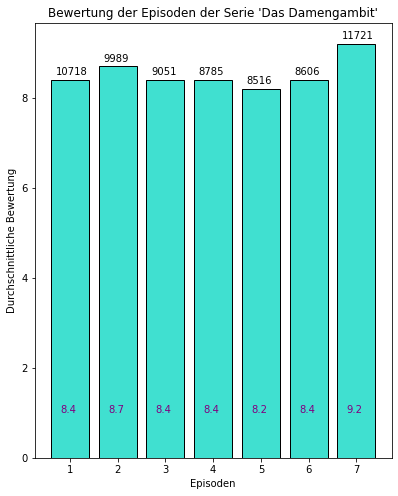

In [21]:
# Verteilung der Balken auf der x-Achse
x_axis = [1, 2, 3, 4, 5, 6, 7]

# Höhe der Balken
# iloc[0,1] entfernt die Labels und nutz die Daten in der zweiten Spalte (erste Datenspalte)
# rating_episode_DG[0] Daten an der ersten Stelle der Liste
rating = [rating_episode_DG[0].iloc[0,1], rating_episode_DG[1].iloc[0,1], rating_episode_DG[2].iloc[0,1], rating_episode_DG[3].iloc[0,1], rating_episode_DG[4].iloc[0,1], rating_episode_DG[5].iloc[0,1], rating_episode_DG[6].iloc[0,1]]

# Bezeichnung der Balken
label = [rating_episode_DG[0].iloc[0,2], rating_episode_DG[1].iloc[0,2], rating_episode_DG[2].iloc[0,2], rating_episode_DG[3].iloc[0,2], rating_episode_DG[4].iloc[0,2], rating_episode_DG[5].iloc[0,2], rating_episode_DG[6].iloc[0,2]] 

# Plot vergrößern (Standardwerte: Breite - 6.4 Höhe - 4.8) um die Stimmen über den Balken im Plot richtig zu präsentieren
plt.rcParams["figure.figsize"] = (6.4,8)

# Balkendiagramm plotten (x-Werte, y-Werte, Breite der Balken, Farbe der Balken, Rahmenfarbe der Balken)
plt.bar(x_axis, rating, width = 0.8, color = "turquoise", edgecolor = "black")

# Schleifen zur Erzeugung der Beschriftung im Diagramm
for index, value in enumerate(rating):
    # index+0.7, value+0.1 sind dazu da, um die angezeigten Werte auszurichten ; str(label[index] dient zur Beschriftung
    plt.text(index+0.7, value+0.1, str(label[index])) 
for index, value in enumerate(rating):
    # +0.8 und 1 sind dazu da die angezeigten Werte zu zentrieren ; str(rating[index] dient zur Beschriftung ; color ändert die Textfarbe
    plt.text(index+0.8, 1, str(rating[index]), color = "purple") 
    
# Beschriftung Plot
plt.xlabel("Episoden")
plt.ylabel("Durchschnittliche Bewertung")
plt.title("Bewertung der Episoden der Serie 'Das Damengambit'")

# Plot anzeigen
plt.show()